In [1]:
import pandas as pd



# predict the final price of each home.

In [2]:
df_train = pd.read_csv('train.csv', index_col = 'Id')
df_test = pd.read_csv('test.csv', index_col = 'Id') # doesnt have Sales price

In [3]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [6]:
df_train.dropna(axis = 1, inplace = True)

In [7]:
df_train.isna().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 61, dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoder = LabelEncoder()
df_train['MSZoning'] = label_encoder.fit_transform(df_train['MSZoning'])

In [10]:
df_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,3,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,3,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,3,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,3,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   int64 
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

In [12]:
# check dtype of every column and convert categorical to numerical

for column in df_train.columns:
    if df_train[column].dtype == 'object':
        df_train[column] = label_encoder.fit_transform(df_train[column])

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   MSZoning       1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   Street         1460 non-null   int64
 4   LotShape       1460 non-null   int64
 5   LandContour    1460 non-null   int64
 6   Utilities      1460 non-null   int64
 7   LotConfig      1460 non-null   int64
 8   LandSlope      1460 non-null   int64
 9   Neighborhood   1460 non-null   int64
 10  Condition1     1460 non-null   int64
 11  Condition2     1460 non-null   int64
 12  BldgType       1460 non-null   int64
 13  HouseStyle     1460 non-null   int64
 14  OverallQual    1460 non-null   int64
 15  OverallCond    1460 non-null   int64
 16  YearBuilt      1460 non-null   int64
 17  YearRemodAdd   1460 non-null   int64
 18  RoofStyle      1460 non-null   int64
 19  RoofMa

In [14]:
# machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [15]:
correlation_matrix = df_train.corr()

In [16]:
#print("Variables with correlation 0.6 or above and positive correlation with SalesPrice:")
#selected_features = []
#for column, correlation in sales_price_correlation.items():
    #if correlation >= 0.6:
       # print(f"{column}: {correlation}")
        #selected_features.append(column)

In [39]:
# Assuming df_train is your training DataFrame and df_test is your test DataFrame
common_columns = df_train.columns.intersection(df_test.columns)
df_train_filtered = df_train[common_columns]


In [40]:

sales_price = df_train["SalePrice"]

In [41]:
feature = df_train_filtered

In [42]:
feature

,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,1,3,3,4,0,5,2,2,...,0,61,0,0,0,0,0,2,2008,4
2,20,9600,1,3,3,2,0,24,1,2,...,298,0,0,0,0,0,0,5,2007,4
3,60,11250,1,0,3,4,0,5,2,2,...,0,42,0,0,0,0,0,9,2008,4
4,70,9550,1,0,3,0,0,6,2,2,...,0,35,272,0,0,0,0,2,2006,0
5,60,14260,1,0,3,2,0,15,2,2,...,192,84,0,0,0,0,0,12,2008,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,1,3,3,4,0,8,2,2,...,0,40,0,0,0,0,0,8,2007,4
1457,20,13175,1,3,3,4,0,14,2,2,...,349,0,0,0,0,0,0,2,2010,4
1458,70,9042,1,3,3,4,0,6,2,2,...,0,60,0,0,0,0,2500,5,2010,4


In [43]:
#train_X, test_X, train_y, test_y = train_test_split(feature, sales_price, random_state = 0)

In [44]:
forest_model = RandomForestRegressor( max_depth= 100,random_state=1)
forest_model.fit(feature, sales_price)
#price_preds = forest_model.predict(test_X)


#print(mean_absolute_error(test_y, price_preds))

print(forest_model.score(feature, sales_price))
#print(forest_model.score(test_X, test_y))

0.9813081019046883


In [45]:
#from scipy.stats import pearsonr
#correlation_coefficient, _ = pearsonr(price_preds, test_y)
#print("Correlation Coefficient on Validation Set:", correlation_coefficient)

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: title={'center': 'Feature Importance'}>

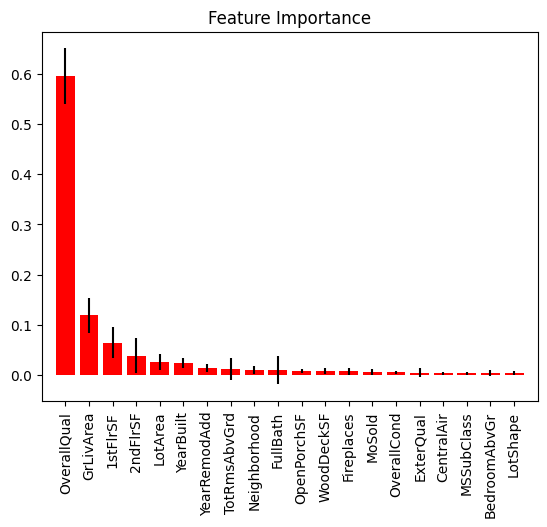

In [47]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(forest_model, feature_names=feature.columns, x_tick_rotation=90)

In [48]:
df_test.dropna(axis = 1, inplace = True)

In [49]:

for column in df_test.columns:
    if df_test[column].dtype == 'object':
        df_test[column] = label_encoder.fit_transform(df_test[column])

In [50]:
df_test.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition'],
      dtype='object')

In [51]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [52]:
df_test = df_test.reset_index()


In [53]:
df_test.head()

,index,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,0,1461,20,11622,1,3,3,4,0,12,...,140,0,0,0,120,0,0,6,2010,4
1,1,1462,20,14267,1,0,3,0,0,12,...,393,36,0,0,0,0,12500,6,2010,4
2,2,1463,60,13830,1,0,3,4,0,8,...,212,34,0,0,0,0,0,3,2010,4
3,3,1464,60,9978,1,0,3,4,0,8,...,360,36,0,0,0,0,0,6,2010,4
4,4,1465,120,5005,1,0,1,4,0,22,...,0,82,0,0,144,0,0,1,2010,4


In [54]:
# Assuming df_train is your training DataFrame and df_test is your test DataFrame
common_columns = df_test.columns.intersection(df_train.columns)
df_test_filtered = df_test[common_columns]

df_test_filtered


,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,20,11622,1,3,3,4,0,12,1,2,...,140,0,0,0,120,0,0,6,2010,4
1,20,14267,1,0,3,0,0,12,2,2,...,393,36,0,0,0,0,12500,6,2010,4
2,60,13830,1,0,3,4,0,8,2,2,...,212,34,0,0,0,0,0,3,2010,4
3,60,9978,1,0,3,4,0,8,2,2,...,360,36,0,0,0,0,0,6,2010,4
4,120,5005,1,0,1,4,0,22,2,2,...,0,82,0,0,144,0,0,1,2010,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,1,3,3,4,0,10,2,2,...,0,0,0,0,0,0,0,6,2006,4
1455,160,1894,1,3,3,4,0,10,2,2,...,0,24,0,0,0,0,0,4,2006,0
1456,20,20000,1,3,3,4,0,11,2,2,...,474,0,0,0,0,0,0,9,2006,0
1457,85,10441,1,3,3,4,0,11,2,2,...,80,32,0,0,0,0,700,7,2006,4


In [55]:
df_train_filtered

,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,1,3,3,4,0,5,2,2,...,0,61,0,0,0,0,0,2,2008,4
2,20,9600,1,3,3,2,0,24,1,2,...,298,0,0,0,0,0,0,5,2007,4
3,60,11250,1,0,3,4,0,5,2,2,...,0,42,0,0,0,0,0,9,2008,4
4,70,9550,1,0,3,0,0,6,2,2,...,0,35,272,0,0,0,0,2,2006,0
5,60,14260,1,0,3,2,0,15,2,2,...,192,84,0,0,0,0,0,12,2008,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,1,3,3,4,0,8,2,2,...,0,40,0,0,0,0,0,8,2007,4
1457,20,13175,1,3,3,4,0,14,2,2,...,349,0,0,0,0,0,0,2,2010,4
1458,70,9042,1,3,3,4,0,6,2,2,...,0,60,0,0,0,0,2500,5,2010,4


In [56]:
# on test data

# Generate predictions using the trained model
price_predictions = forest_model.predict(df_test_filtered)
# Create a DataFrame to store the 'Id' and corresponding predictions
output = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': price_predictions})

# Save the DataFrame to a CSV file
output.to_csv('Housing_Prices_3_Competition.csv', index=False)